Alunos(as)/RAs:<br>
Bruna Mezzari Carlos -	235624<br>
Jean Antonio Ribeiro -	265739<br>
Kellen Natalice Vilharva -	235493<br>
Roberto Junio de Almeida Candian -	214572<br>
Tatiana Aparecida de Almeida -	229136



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from sklearn import linear_model
#from google.colab import drive

#drive.mount('/content/drive')

# Leitura dos dados

In [2]:
#!git clone https://github.com/JeanKusanagi/E1--Vaccine-immunology

DATA_DIR = './E1--Vaccine-immunology/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/JeanKusanagi/E1--Vaccine-immunology')
    print('Done!')

Loading data...
Done!


In [3]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv")

#df = df.rename(columns={'Hepatite B  em crianças até 30 dias': 'Hepatite B30'})
#df = df.rename(columns={'Pneumocócica(1° ref)': 'Pneumocócica1'})
#df = df.rename(columns={'Meningococo C (1° ref)': 'Meningococo1'})
#df = df.rename(columns={'Poliomielite(1° ref)': 'Poliomielite1'})
df.head()

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,88.31,0.0,0.0,0.0,8.85,0.0,0.0,58.24,0.0,5.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.76,0.0,0.0,71.37,0.00,0.0,0.0,0.0,4.69,38.27
1,1995,103.63,0.0,0.0,0.0,10.50,0.0,0.0,77.83,0.0,4.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.54,0.0,0.0,86.86,0.00,0.0,0.0,0.0,23.61,45.71
2,1996,104.21,0.0,0.0,0.0,16.50,0.0,0.0,80.86,0.0,5.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.25,0.0,0.0,80.40,0.01,0.0,0.0,0.0,42.10,50.01
3,1997,117.12,0.0,0.0,0.0,5.79,0.0,0.0,89.27,0.0,7.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.50,0.0,0.0,108.61,0.03,0.0,0.0,0.0,106.68,68.95
4,1998,111.61,0.0,0.0,0.0,12.63,0.0,0.0,95.30,0.0,18.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.97,0.0,0.0,95.26,0.84,0.0,0.0,0.0,104.36,70.65


# Funções

Remove a última linha do DataSet, pois a coluna Ano contém um valor string igual a 'Total'.

In [4]:
def NovoDataSet(df):
  new_df = df.copy()

  it=0
  for i, row in new_df.iterrows():
    if row['Ano'] == 'Total':
      #print('Achou')
      it=i
  print('Iterador: ', it)
  new_df  =new_df.drop(it)
  
  return new_df

In [ ]:
from numpy.random import rand

def fill_dummy_values(df, scaling_factor):
  # Create copy of dataframe 
  df_dummy = df.copy(deep=True)
  
  # Iterate over each column
  for col in df_dummy:
    # Get column, column missing values and range   
    col = df_dummy[col]
    col = pd.to_numeric(col)
    #col = pd.to_numeric(col, errors='ignore')
    col_null = col.isnull()       
    num_nulls = col_null.sum()   
    col_range = col.max() - col.min()
    
    # Shift and scale dummy values   
    dummy_values = (rand(num_nulls) - 2)    
    dummy_values = dummy_values * scaling_factor * col_range + col.min()
    
    # Return dummy values   
    col[col_null] = dummy_values

  return df_dummy

#fill_dummy_values(new_df,0.3)

Cria um DataSet com os valores de um conjunto de DataSet, baseado em um determinado Ano.

In [ ]:
def BuscaDadosPorAno(ano, bases):
  Local = []
  BCG = []
  HepatiteB30 = []
  RotavirusHumano = []
  MeningococoC = []
  HepatiteB = []
  Penta = []
  Pneumococica = []
  Poliomielite = []
  Poliomielite4 = []
  FebreAmarela = []
  HepatiteA = []
  Pneumococica1 = []
  MeningococoC1 = []
  Poliomielite1  = []	
  TripliceViralD1 = []
  TripliceViralD2 = []
  TetraViral = []
  DTP = []
  DTP_REF = []
  TripliceBacteriana = []
  Sarampo = []
  Haemophilus = []
  Dupla = []
  dTpaGestante = []
  Tetravalente = []
  Ignorado = []
  Total = []

  s = '/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/'
  for i in bases:
    r=s+i
    #print(r)
    base = pd.read_csv(r)
    for index, row in base.iterrows():
      if row['Ano'] == ano:
        #print(row['Ano'], row['BCG'])
        #print(row['Total'])
        Local.append(i)
        BCG.append(row['BCG'])
        HepatiteB30.append(row['Hepatite B em crianças até 30 dias'])
        RotavirusHumano.append(row['Rotavírus Humano'])
        MeningococoC.append(row['Meningococo C'])
        HepatiteB.append(row['Hepatite B'])
        Penta.append(row['Penta'])
        Pneumococica.append(row['Pneumocócica'])
        Poliomielite.append(row['Poliomielite'])
        Poliomielite4.append(row['Poliomielite 4 anos'])
        FebreAmarela.append(row['Febre Amarela'])
        HepatiteA.append(row['Hepatite A'])
        Pneumococica1.append(row['Pneumocócica(1° ref)'])
        MeningococoC1.append(row['Meningococo C (1° ref)'])
        Poliomielite1.append(row['Poliomielite(1° ref)'])	
        TripliceViralD1.append(row['Tríplice Viral  D1'])
        TripliceViralD2.append(row['Tríplice Viral  D2'])
        TetraViral.append(row['Tetra Viral(SRC+VZ)'])
        DTP.append(row['DTP'])
        DTP_REF.append(row['DTP REF (4 e 6 anos)'])
        TripliceBacteriana.append(row['Tríplice Bacteriana(DTP)(1° ref)'])
        Sarampo.append(row['Sarampo'])
        Haemophilus.append(row['Haemophilus influenzae b'])
        Dupla.append(row['Dupla adulto e tríplice acelular gestante'])
        dTpaGestante.append(row['dTpa gestante'])
        Tetravalente.append(row['Tetravalente (DTP/Hib) (TETRA)'])
        Ignorado.append(row['Ignorado'])
        Total.append(row[' Total'])

  new_tb = pd.DataFrame()

  new_tb['Local'] = Local
  new_tb['BCG'] = BCG
  new_tb['Hepatite B em crianças até 30 dias'] = HepatiteB30
  new_tb['Rotavírus Humano'] = RotavirusHumano
  new_tb['Meningococo C'] = MeningococoC
  new_tb['Hepatite B'] = HepatiteB
  new_tb['Penta'] = Penta
  new_tb['Pneumocócica'] = Pneumococica
  new_tb['Poliomielite'] = Poliomielite
  new_tb['Poliomielite 4 anos'] = Poliomielite4
  new_tb['Febre Amarela'] = FebreAmarela
  new_tb['Hepatite A'] = HepatiteA
  new_tb['Poliomielite(1° ref)'] = Pneumococica1
  new_tb['Meningococo C (1° ref)'] = MeningococoC1
  new_tb['Poliomielite(1° ref)'] = Poliomielite1
  new_tb['Tríplice Viral D1'] = TripliceViralD1
  new_tb['Tríplice Viral D2'] = TripliceViralD2
  new_tb['Tetra Viral(SRC+VZ)'] = TetraViral
  new_tb['DTP'] = DTP
  new_tb['DTP REF (4 e 6 anos)'] = DTP_REF
  new_tb['Tríplice Bacteriana(DTP)(1° ref)'] = TripliceBacteriana
  new_tb['Sarampo'] = Sarampo
  new_tb['Haemophilus influenzae b'] = Haemophilus
  new_tb['Dupla adulto e tríplice acelular gestante'] = Dupla
  new_tb['dTpa gestante'] = dTpaGestante
  new_tb['Tetravalente (DTP/Hib) (TETRA)'] = Tetravalente
  new_tb['Ignorado'] = Ignorado
  new_tb['Total'] = Total

  return new_tb

Busca dados de uma determinada doença em um conjunto de base de dados para todos os anos.

In [ ]:
def BuscaDadosPorDoenca(ano, doenca, bases):
  s = '/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/'
  r=s+bases[0]
  db = pd.read_csv(r)
  variacao_anos = db['Ano']
  #variacao_anos = [2020]
  #print(variacao_anos)

  new_tb = pd.DataFrame()
  #regioes = []
  #v = []

  new_tb['Ano'] = db['Ano']

  for i in bases:
    #regioes.append(i)
    r=s+i
    #print(r)
    base = pd.read_csv(r)
    new_tb[i] = base[doenca]
    #for index, row in base.iterrows():
      #print(row['Ano'])
      #new_tb[doenca] = row[doenca]
      #for a in variacao_anos:
        #print(a)
        #v.append(row[doenca])
        #print(row[doenca])
        #new_tb[a] = row[doenca]
        #if row[doenca] == ano:
        #  pass
        #  new_tb[doenca] = row[doenca]

        #print(row['Ano'], row['BCG'])
        #print(row['Total'])
        #Local.append(i)
        #BCG.append(row['BCG'])
      #new_tb[a] = v
      #v=[]

    #new_tb['Anos'] = v
    #new_tb['Regiões'] = regioes

  return new_tb

bases_sudeste = [
        'ano_imuno_sudeste.csv',
        'ano_imuno_sudeste_capitais.csv',
        'ano_imuno_sudeste_extrprobeza=n.csv',
        'ano_imuno_sudeste_extrprobeza=s.csv'
]

bases_sul = [
        'ano_imuno_sul.csv',
        'ano_imuno_sul_capitais.csv',
        'ano_imuno_sul_extrprobeza=n.csv',
        'ano_imuno_sul_extrprobeza=s.csv'
]

bases_centrooeste = [
        'ano_imuno_centrooeste.csv',
        'ano_imuno_centrooeste_capitais.csv',
        'ano_imuno_centrooeste_extrprobeza=n.csv',
        'ano_imuno_centrooeste_extrprobeza=s.csv'
]

bases_norte = [
        'ano_imuno_norte.csv',
        'ano_imuno_norte_capitais.csv',
        'ano_imuno_norte_extrprobeza=n.csv',
        'ano_imuno_norte_extrprobeza=s.csv'
]

bases_nordeste = [
        'ano_imuno_nordeste.csv',
        'ano_imuno_nordeste_capitais.csv',
        'ano_imuno_nordeste_extrprobeza=n.csv',
        'ano_imuno_nordeste_extrprobeza=s.csv'
]


r = BuscaDadosPorDoenca(2020,'BCG',bases_sudeste)
r = r.rename(columns={'ano_imuno_sudeste.csv': 'Sudeste'})
r = r.rename(columns={'ano_imuno_sudeste_capitais.csv': 'Sudeste Capitais'})
r = r.rename(columns={'ano_imuno_sudeste_extrprobeza=n.csv': 'Sudeste Extrema Probeza n'})
r = r.rename(columns={'ano_imuno_sudeste_extrprobeza=s.csv': 'Sudeste Extrema Probeza s'})

In [5]:
# Cria datasets para cada imunizante, contendo ano e região do Brasil
am_legal = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_amazlegal=s.csv')
semiarido = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_semiarido=s.csv')
zdefronteira = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_zdefronteira=s.csv')
capitais = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_capitais.csv')
extrpobreza = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_extrprobeza=s.csv')
br = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv')
br = NovoDataSet(br)
d = {'1 Região Norte': 'Norte', '2 Região Nordeste': 'Nordeste', '3 Região Sudeste':'Sudeste',
       '4 Região Sul': 'Sul', '5 Região Centro-Oeste': 'Centro-Oeste'}

bcg = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_bcg.csv')
bcg = bcg.drop(' Total',axis=1)
bcg = NovoDataSet(bcg)
bcg['Ano'] = bcg['Ano'].astype(float)
bcg = bcg[bcg['Ano'] != 2021]
bcg['Am legal'] = am_legal['BCG']
bcg['Semiarido'] = semiarido['BCG']
bcg['Z de Fronteira'] = zdefronteira['BCG']
bcg['Extr Pobreza'] = extrpobreza['BCG']
bcg['Capitais'] = capitais['BCG']
bcg['Brasil'] = br['BCG']
bcg = bcg.rename(columns=d)

polio = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_polio.csv')
polio = polio.drop(' Total',axis=1)
polio = NovoDataSet(polio)
polio['Ano'] = polio['Ano'].astype(float)
polio = polio[polio['Ano'] != 2021]
polio['Am legal'] = am_legal['Poliomielite']
polio['Semiarido'] = semiarido['Poliomielite']
polio['Z de Fronteira'] = zdefronteira['Poliomielite']
polio['Extr Pobreza'] = extrpobreza['Poliomielite']
polio['Capitais'] = capitais['Poliomielite']
polio['Brasil'] = br['Poliomielite']
polio = polio.rename(columns=d)

hepb = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_hepB.csv')
hepb = hepb.drop(' Total',axis=1)
hepb = NovoDataSet(hepb)
hepb['Ano'] = hepb['Ano'].astype(float)
hepb = hepb[hepb['Ano'] != 2021]
hepb['Am legal'] = am_legal['Hepatite B']
hepb['Semiarido'] = semiarido['Hepatite B']
hepb['Z de Fronteira'] = zdefronteira['Hepatite B']
hepb['Extr Pobreza'] = extrpobreza['Hepatite B']
hepb['Capitais'] = capitais['Hepatite B']
hepb['Brasil'] = br['Hepatite B']
hepb=hepb.rename(columns=d)

dtp = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_região_dtp.csv')
dtp = dtp.drop(' Total',axis=1)
dtp = NovoDataSet(dtp)
dtp['Ano'] = dtp['Ano'].astype(float)
dtp = dtp[dtp['Ano'] != 2021]
dtp['Am legal'] = am_legal['DTP']
dtp['Semiarido'] = semiarido['DTP']
dtp['Z de Fronteira'] = zdefronteira['DTP']
dtp['Extr Pobreza'] = extrpobreza['DTP']
dtp['Capitais'] = capitais['DTP']
dtp['Brasil'] = br['DTP']
dtp=dtp.rename(columns=d)

bcg.head()


Iterador:  28
Iterador:  27
Iterador:  27
Iterador:  27
Iterador:  23


,Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,Capitais,Brasil
0,1994.0,74.03,94.40,94.31,112.64,64.92,73.62,95.06,72.80,88.56,100.91,88.31
1,1995.0,102.35,102.40,112.61,96.43,86.15,103.09,101.56,102.63,97.30,109.99,103.63
2,1996.0,107.61,101.02,107.16,100.73,109.52,105.51,94.49,101.54,90.32,122.09,104.21
3,1997.0,114.40,115.79,120.77,110.19,120.80,118.12,110.16,110.22,104.66,142.19,117.12
4,1998.0,99.02,110.03,117.59,104.64,117.64,106.16,99.06,110.12,94.65,136.39,111.61


In [6]:
#Cria datasets com a média de imunização de cada continente por ano

df1 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_bcg_editado.csv')
df2 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_polio_editado.csv')
df3 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_hepB_editado.csv')
df4 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_dtp3_editado.csv')
column_names = ["Ano","Americas", "Europe", "Africa"]

bcg_mundo = pd.DataFrame(columns = column_names)
bcg_mundo[['Ano', 'Americas']] = df1[df1['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df1['Period'],axis=0).mean()
bcg_mundo['Europe'] = df1[df1['ParentLocation'] == 'Europe']['Value'].groupby(df1['Period'],axis=0).mean()
bcg_mundo['Africa'] = df1[df1['ParentLocation'] == 'Africa']['Value'].groupby(df1['Period'],axis=0).mean()
bcg_mundo = bcg_mundo[bcg_mundo['Ano'] >= 1994]

polio_mundo = pd.DataFrame(columns = column_names)
polio_mundo[['Ano', 'Americas']] = df2[df2['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df2['Period'],axis=0).mean()
polio_mundo['Europe'] = df2[df2['ParentLocation'] == 'Europe']['Value'].groupby(df2['Period'],axis=0).mean()
polio_mundo['Africa'] = df2[df2['ParentLocation'] == 'Africa']['Value'].groupby(df2['Period'],axis=0).mean()
polio_mundo = polio_mundo[polio_mundo['Ano'] >= 1994]

hepb_mundo = pd.DataFrame(columns = column_names)
hepb_mundo[['Ano', 'Americas']] = df3[df3['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df3['Period'],axis=0).mean()
hepb_mundo['Europe'] = df3[df3['ParentLocation'] == 'Europe']['Value'].groupby(df3['Period'],axis=0).mean()
hepb_mundo['Africa'] = df3[df3['ParentLocation'] == 'Africa']['Value'].groupby(df3['Period'],axis=0).mean()
hepb_mundo = hepb_mundo[hepb_mundo['Ano'] >= 1994]

dtp_mundo = pd.DataFrame(columns = column_names)
dtp_mundo[['Ano', 'Americas']] = df4[df4['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df4['Period'],axis=0).mean()
dtp_mundo['Europe'] = df4[df4['ParentLocation'] == 'Europe']['Value'].groupby(df4['Period'],axis=0).mean()
dtp_mundo['Africa'] = df4[df4['ParentLocation'] == 'Africa']['Value'].groupby(df4['Period'],axis=0).mean()
dtp_mundo = dtp_mundo[dtp_mundo['Ano'] >= 1994]

dtp_mundo.head()

,Ano,Americas,Europe,Africa
Period,,,,
1994,1994.0,85.114286,89.254902,63.886364
1995,1995.0,86.142857,91.215686,65.750000
1996,1996.0,84.485714,91.882353,64.068182
1997,1997.0,86.285714,92.711538,62.659091
1998,1998.0,86.314286,92.865385,63.340909


In [7]:
polio_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/polio_mundo_br.csv")
polio_mundo_br = polio_mundo_br.rename(columns=d)
bcg_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/bcg_mundo_br.csv")
bcg_mundo_br = bcg_mundo_br.rename(columns=d)
dtp_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/dtp_mundo_br.csv")
dtp_mundo_br = dtp_mundo_br.rename(columns=d)
hepb_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/hepb_mundo_br.csv")
hepb_mundo_br = hepb_mundo_br.rename(columns=d)
hepb_mundo_br.head()

,Period,Ano,Americas,Europe,Africa,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,Capitais,Brasil
0,1994,1994.0,48.000000,63.333333,57.000000,16.32,0.01,90.42,38.45,0.00,9.64,0.00,24.85,3.08,7.24,8.85
1,1995,1995.0,62.000000,58.363636,65.000000,39.16,0.00,5.36,30.66,0.31,24.26,0.00,29.93,4.41,9.95,10.50
2,1996,1996.0,72.750000,76.000000,66.600000,47.33,0.04,5.39,53.60,19.48,30.03,0.01,41.36,7.63,19.51,16.50
3,1997,1997.0,69.800000,75875.000000,72.428571,12.82,0.14,1.62,24.27,6.90,8.61,0.03,19.30,3.46,6.66,5.79
4,1998,1998.0,74.285714,74.050000,76.000000,28.07,4.27,6.60,33.72,18.75,20.08,2.63,31.74,6.73,17.44,12.63


In [8]:
brasil_indices = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/brasil_indices.csv')
brasil_indices.head()

,Ano,ed_ind,health_expenditure,mortality_children_under_1_year_per_1000,idh,obitos_infantis,exp_vida_anos,bcg,dtp,hepb,polio,febreamarela
0,1994,511,NaN,NaN,642,87304,67.9,88.31,64.76,8.85,58.24,5.27
1,1995,523,NaN,47.9,651,81572,68.3,103.63,80.54,10.50,77.83,4.81
2,1996,535,NaN,NaN,658,75024,68.7,104.21,78.25,16.50,80.86,5.65
3,1997,547,NaN,NaN,665,71400,69.1,117.12,78.50,5.79,89.27,7.84
4,1998,559,NaN,NaN,670,71690,69.4,111.61,92.97,12.63,95.30,18.49


# Gráficos de Correlação e Boxplot

Text(0.5, 0.98, 'Cobertura BCG no Brasil 1994 - 2020')

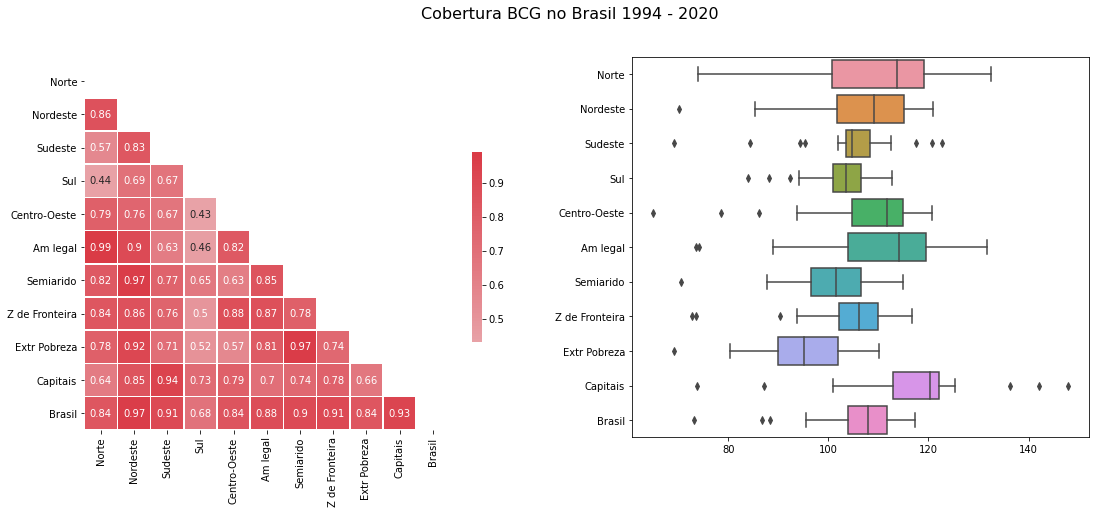

In [ ]:
# Generate a mask for the upper triangle
df = bcg 
#maxVal = 100
#df = df.where(df <= maxVal, maxVal)

corr = df.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = df.drop('Ano', axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura BCG no Brasil 1994 - 2020', fontsize=16)

Text(0.5, 0.98, 'Cobertura Poliomielite no Brasil 1994 - 2020')

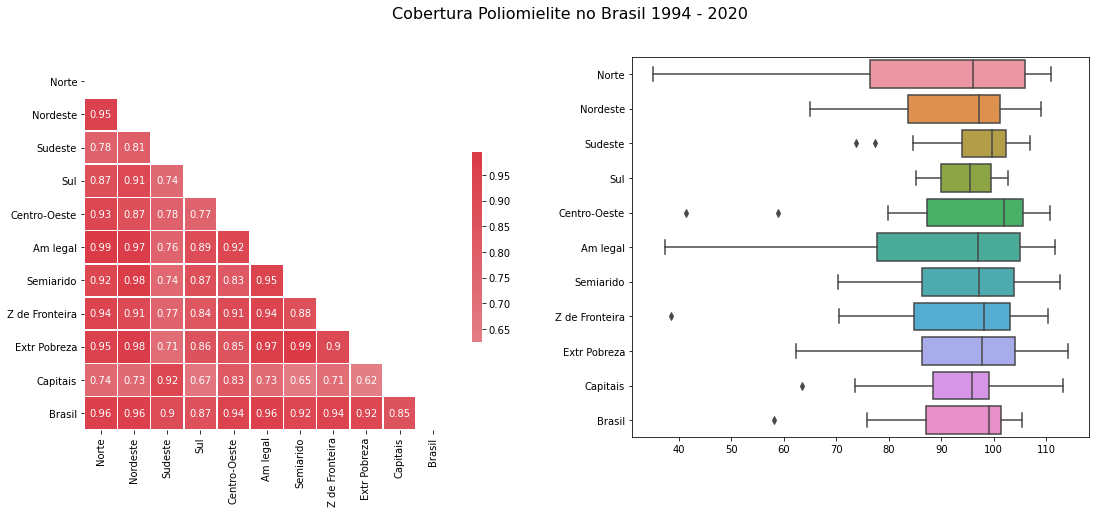

In [ ]:
# Generate a mask for the upper triangle
df = polio
#maxVal = 100
#df = df.where(df <= maxVal, maxVal)

corr = df.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = df.drop('Ano',axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura Poliomielite no Brasil 1994 - 2020', fontsize=16)

Text(0.5, 0.98, 'Cobertura Hepatite B no Brasil 1994 - 2020')

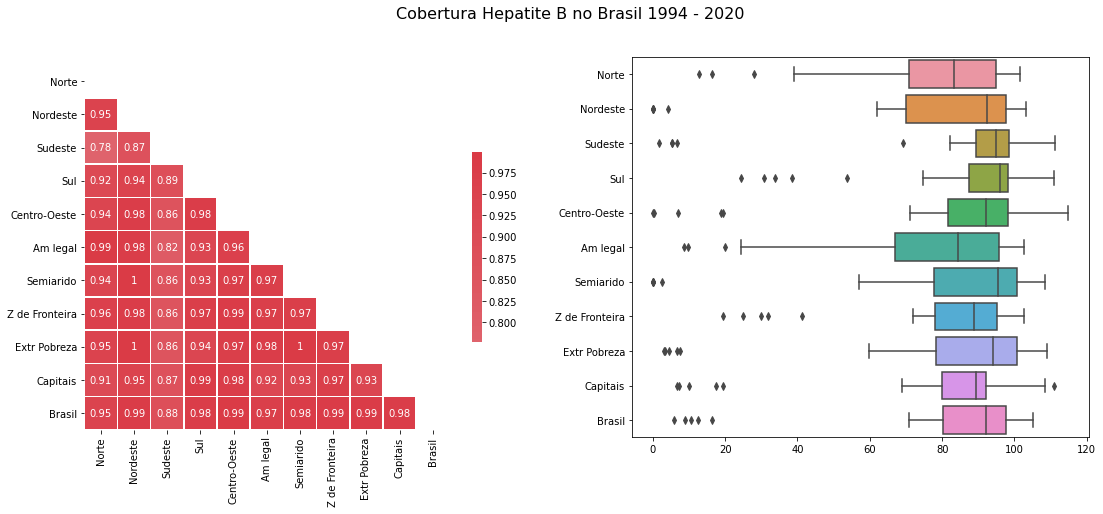

In [ ]:
df = hepb
#maxVal = 100
#df = df.where(df <= maxVal, maxVal)

# Generate a mask for the upper triangle
corr = df.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = df.drop('Ano', axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura Hepatite B no Brasil 1994 - 2020', fontsize=16)

Text(0.5, 0.98, 'Cobertura DTP no Brasil 1994 - 2016 (sem info no ano de 2003)')

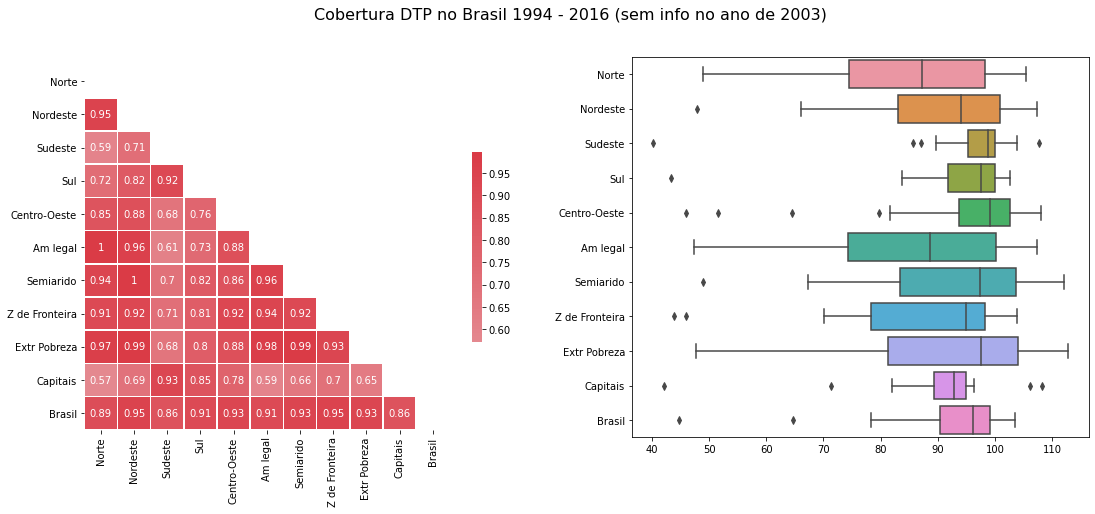

In [ ]:
# Generate a mask for the upper triangle
dtp_clean = dtp[dtp['Ano'] != 2003]
corr = dtp_clean.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = dtp_clean.drop('Ano', axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura DTP no Brasil 1994 - 2016 (sem info no ano de 2003)', fontsize=16)

Text(0.5, 0.98, 'Cobertura vacinal no Brasil 1994 - 2020')

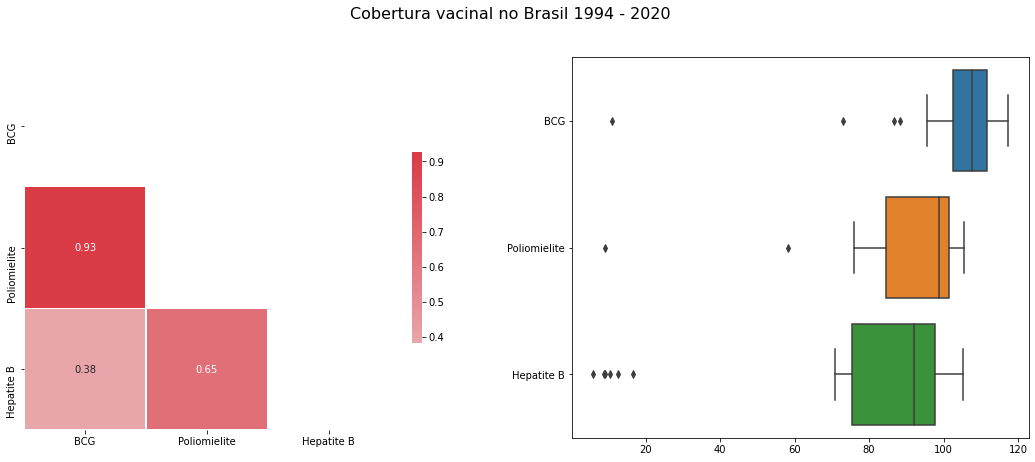

In [9]:
# Generate a mask for the upper triangle
br['Ano'] = br['Ano'].astype(int)
corr = br[['BCG', 'Poliomielite', 'Hepatite B']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);

data = br.drop('Ano', axis=1)[['BCG', 'Poliomielite', 'Hepatite B']]
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura vacinal no Brasil 1994 - 2020', fontsize=16)


Text(0.5, 0.98, 'Cobertura Poliomielite no Brasil e mundo 1994 - 2019')

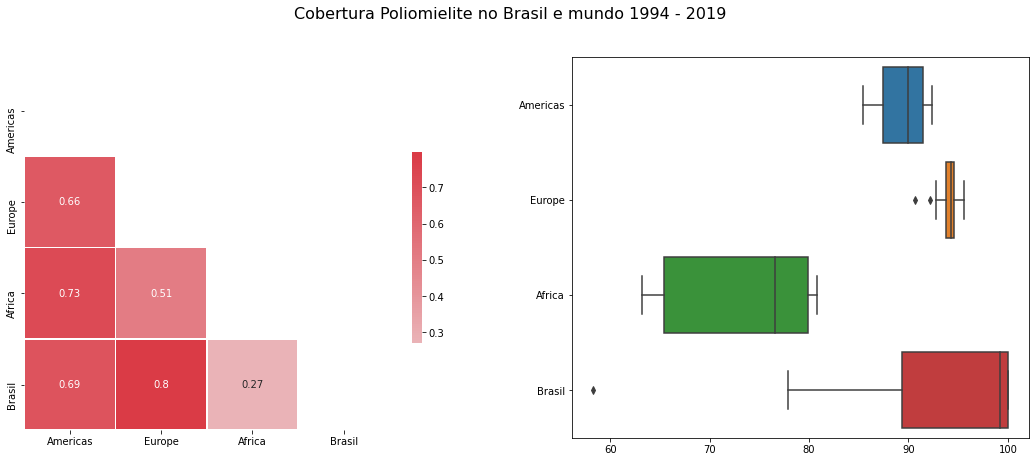

In [ ]:
# Generate a mask for the upper triangle
polio_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/polio_mundo_br.csv")
df = polio_mundo_br
maxVal = 100
df = df.where(df <= maxVal, maxVal)
corr = df[['Americas','Europe','Africa', 'Brasil']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);

data = df[['Americas','Europe','Africa', 'Brasil']]
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura Poliomielite no Brasil e mundo 1994 - 2019', fontsize=16)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0.98, 'Índices Socias e cobertura da Poliomielite no Brasil 1994 - 2019')

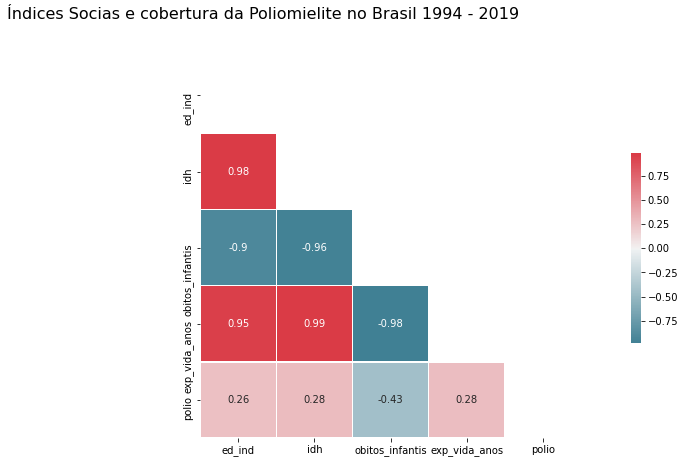

In [ ]:
# Generate a mask for the upper triangle
df = brasil_indices[['Ano','ed_ind','idh','obitos_infantis','exp_vida_anos','polio']]
df['polio'] = df['polio'].where(df['polio'] <= maxVal, maxVal)
corr = df.drop('Ano', axis=1).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=1,figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});
f.suptitle('Índices Socias e cobertura da Poliomielite no Brasil 1994 - 2019', fontsize=16)


# Gráficos Temporais

Text(0.5, 0.98, 'Cobertura Vacinal no Brasil 1994 - 2020')

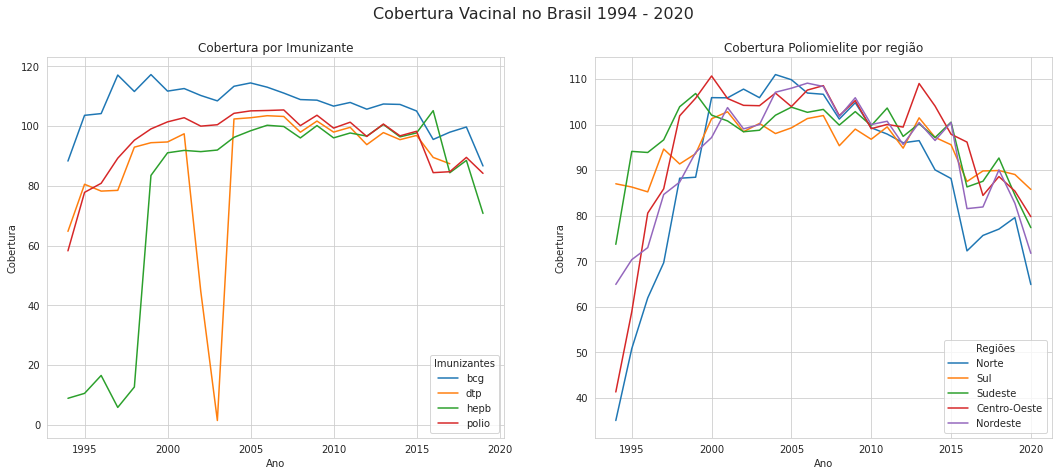

In [ ]:
sns.set_style(style='whitegrid')
df = brasil_indices[['Ano','bcg','dtp','hepb','polio']]
#df = df.where(df <= maxVal, maxVal)

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

df = df.melt('Ano', var_name='Imunizantes',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Imunizantes', data=df, ax = axs[0])
df2 = polio[['Ano','Norte','Sul','Sudeste','Centro-Oeste','Nordeste']]
df2 = df2.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df2, ax = axs[1])
axs[0].set_title('Cobertura por Imunizante')
axs[1].set_title('Cobertura Poliomielite por região')

f.suptitle('Cobertura Vacinal no Brasil 1994 - 2020', fontsize=16)

Text(0.5, 0.98, 'Cobertura Poliomielite no Brasil 1994 - 2020')

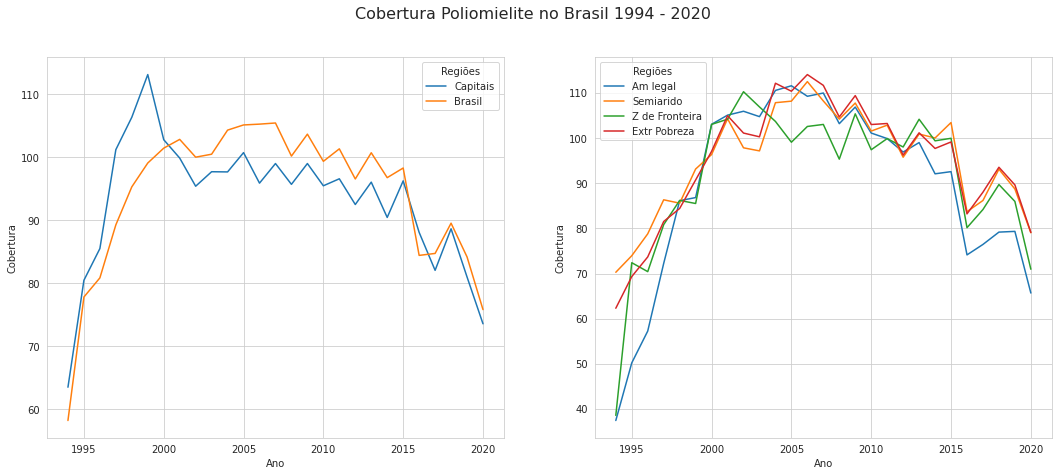

In [ ]:
sns.set_style(style='whitegrid')
df = polio[['Ano','Capitais','Brasil']]
#df = df.where(df <= maxVal, maxVal)

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

df = df.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df, ax = axs[0])

df2 = polio[['Ano','Am legal','Semiarido','Z de Fronteira','Extr Pobreza']]
df2 = df2.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df2, ax = axs[1])
#axs[0].set_title('Cobertura por Imunizante')
#axs[1].set_title('Cobertura Poliomielite por região')

f.suptitle('Cobertura Poliomielite no Brasil 1994 - 2020', fontsize=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0.98, 'Cobertura Poliomielite no Brasil e mundo 1994 - 2020')

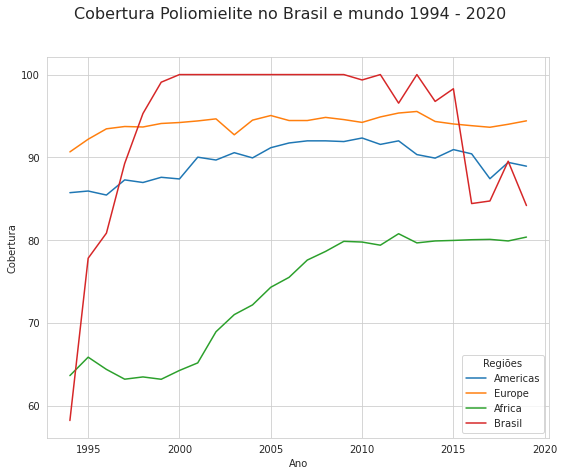

In [ ]:
polio_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/polio_mundo_br.csv")
df = polio_mundo_br[['Ano','Americas','Europe','Africa','Brasil']]
df['Brasil'] = df['Brasil'].where(df['Brasil'] <= maxVal, maxVal)

sns.set_style(style='whitegrid')

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=1,figsize=(9, 7))

df = df.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df)

#df2 = polio[['Ano','Am legal','Semiarido','Z de Fronteira','Extr Pobreza']]
#df2 = df2.melt('Ano', var_name='Regiões',  value_name='Cobertura')
#sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df2, ax = axs[1])
#axs[0].set_title('Cobertura por Imunizante')
#axs[1].set_title('Cobertura Poliomielite por região')

f.suptitle('Cobertura Poliomielite no Brasil e mundo 1994 - 2020', fontsize=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Número total de óbitos')

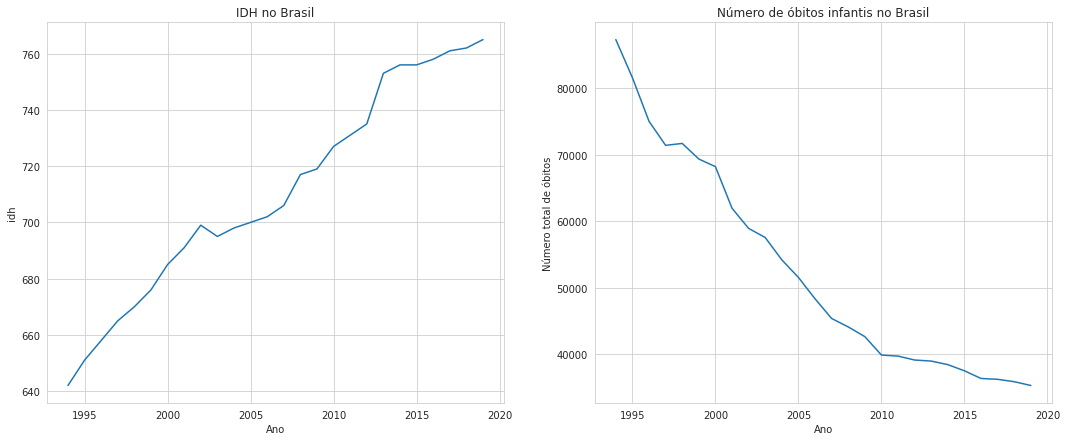

In [12]:
df = brasil_indices[['Ano','ed_ind','idh','obitos_infantis','exp_vida_anos','polio']]
df['polio'] = df['polio'].where(df['polio'] <= maxVal, maxVal)

sns.set_style(style='whitegrid')

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

df1 = df[['Ano','idh']]
sns.lineplot(x="Ano", y='idh', data=df1, ax=axs[0])

df2 = df[['Ano','obitos_infantis']]
sns.lineplot(x="Ano", y='obitos_infantis', data=df2, ax=axs[1])


axs[0].set_title('IDH no Brasil')
axs[1].set_ylabel('IDH')
axs[1].set_title('Número de óbitos infantis no Brasil')
axs[1].set_ylabel('Número total de óbitos')

#f.suptitle('Índices', fontsize=16)